## <font color='#0f62fe'>IBM HR Analytics Employee Attrition & Performance</font>

In [14]:
#Importing required libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio

#Ignoring warnings
import warnings
from scipy import stats
warnings.simplefilter(action='ignore', category=FutureWarning) # Suppress FutureWarnings from SciPy

### About the problem

This assignment will verse around dealing with a Machine Learning problem: predict whether an employee will leave the company or not. The dataset is available on [Kaggle](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset) and you can find the explanation of the columns there.

More detailed info about the dataset: http://inseaddataanalytics.github.io/INSEADAnalytics/groupprojects/January2018FBL/IBM_Attrition_VSS.html

(IBM colours:https://www.ibm.com/design/language/color/)

In [15]:
attrition = pd.read_csv("attrition.csv")

In [16]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Data exploration

1. Display the proportion of employees who left and stayed
2. Display the department with the highest proportion of employees who left
3. Display the average age at which employees leave the company and compare it to the average age of employees who stay
4. Display the proportion of employees who left by job role
5. Display the average age at which employees leave by job role

Extra: which department and job role would you target to reduce the attrition rate?


In [17]:
#Get a first sense of the data
attrition.head(n=10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [18]:
attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [19]:
#Converting the values 'Yes' and 'No' (Attrition column) into boolean variables
attrition['Attrition'] = (attrition['Attrition'] == 'Yes').astype(int)
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


- 1. Display the proportion of employees who left and stayed

In [20]:
#1. The proportion of employees who left (1) and stayed (0)
attrition['Attrition'].value_counts(1)

Attrition
0    0.838776
1    0.161224
Name: proportion, dtype: float64

- 2. Display the department with the highest proportion of employees who left

In [21]:
#Proportion of employees who left by department
department_attrition = attrition.groupby('Department')['Attrition'].apply(lambda x: (x == 1).mean()).reset_index()
department_attrition.sort_values(by="Attrition", ascending=False)

,Department,Attrition
2,Sales,0.206278
0,Human Resources,0.190476
1,Research & Development,0.138398


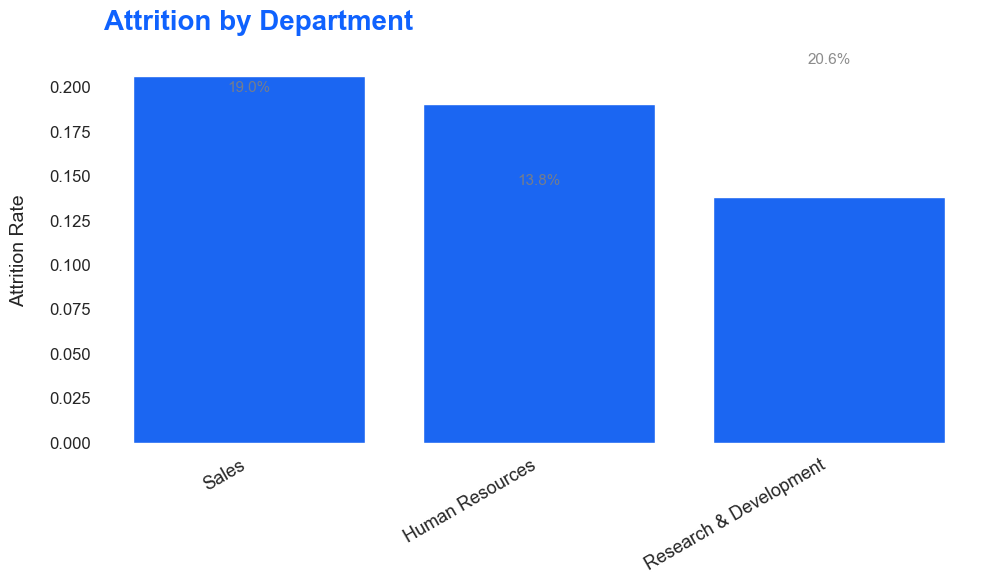

In [28]:
sns.set_theme(style="white")

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

# IBM blue color
ibm_blue = '#0f62fe'

# Plot bars with IBM blue and white edges
barplot = sns.barplot(
    data=department_attrition_sorted,
    x='Department',
    y='Attrition',
    color=ibm_blue,
    edgecolor='white',
    linewidth=1,
    saturation=0.9
)

# Remove grid and spines for minimalist style
sns.despine(left=True, bottom=True)
barplot.set_axisbelow(True)

# Modern typography and colors
plt.title('Attrition by Department', fontsize=20, fontweight='bold', loc='left', pad=20, color=ibm_blue)
plt.ylabel('Attrition Rate', fontsize=14, labelpad=15)
plt.xlabel('', fontsize=0)
plt.xticks(fontsize=13, rotation=30, ha='right')
plt.yticks(fontsize=12)

# Subtle grey percentage labels on top of bars
for index, row in department_attrition_sorted.iterrows():
    plt.text(
        index, row['Attrition'] + 0.005, f"{row['Attrition']:.1%}",
        color='grey', ha='center', va='bottom', fontsize=11, alpha=0.9
    )

# Remove left axis line for minimalist finish
barplot.spines['left'].set_visible(False)

# Adjust layout for balanced whitespace
plt.tight_layout()

# Show the plot
plt.show()


In [23]:
#Display the department with the highest proportion of employees who left
department_attrition = attrition.groupby('Department')['Attrition'].apply(lambda x: (x == 1).mean()).reset_index()
department_attrition.sort_values(by="Attrition", ascending=False).head(1)

,Department,Attrition
2,Sales,0.206278


- 3. Display the average age at which employees leave the company and compare it to the average age of employees who stay


In [24]:
average_age_attrition = attrition.groupby('Attrition')['Age'].mean().reset_index()
average_age_attrition

,Attrition,Age
0,0,37.561233
1,1,33.607595


<font color='##061727'>
The average age of employees who leave the company (attrition=1) is lower by approximately 4 years compared to the average age of employees who stay in the company.

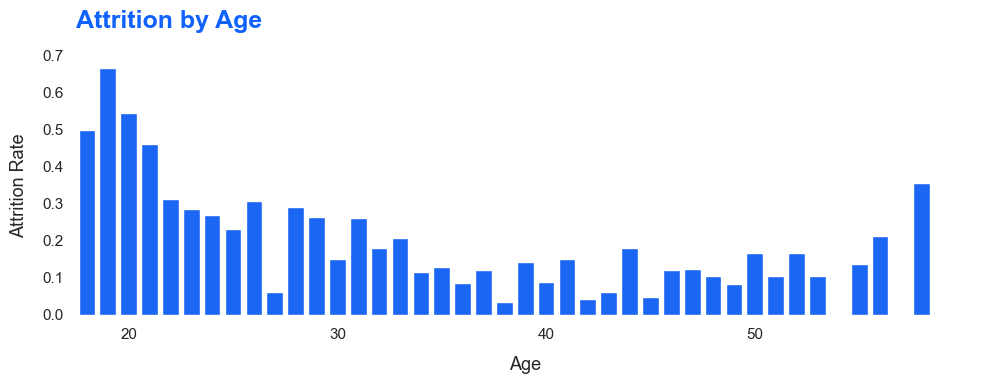

In [37]:
# Aggregate attrition rate by age
age_attrition = attrition.groupby('Age')['Attrition'].mean().reset_index()

# Set minimalist style
sns.set_theme(style="white")

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 4), facecolor='white')

# IBM blue color
ibm_blue = '#0f62fe'

# Plot bars with IBM blue and white edges
barplot = sns.barplot(
    data=age_attrition,
    x='Age',
    y='Attrition',
    color=ibm_blue,
    edgecolor='white',
    linewidth=1,
    saturation=0.9,
    ax=ax
)

# Remove grid and spines for minimalist style
sns.despine(left=True, bottom=True)
barplot.set_axisbelow(True)

# Modern typography and colors
plt.title('Attrition by Age', fontsize=18, fontweight='bold', loc='left', pad=20, color=ibm_blue)
plt.ylabel('Attrition Rate', fontsize=13, labelpad=10)
plt.xlabel('Age', fontsize=13, labelpad=10)

# Desired custom ticks only: 20, 30, 40, 50
custom_ages = [20, 30, 40, 50]

# Get the corresponding positions (indices) for these ages
positions = [age_attrition.index[age_attrition['Age'] == age][0] for age in custom_ages if age in age_attrition['Age'].values]

# Set ticks at the correct bar positions with desired age labels
plt.xticks(ticks=positions, labels=[str(age) for age in custom_ages if age in age_attrition['Age'].values], fontsize=11)
plt.yticks(fontsize=11)

# Remove left axis line for minimalist finish
barplot.spines['left'].set_visible(False)

# Adjust layout for balanced whitespace
plt.tight_layout()

# Show the plot
plt.show()


- 4. Display the proportion of employees who left by job role

In [38]:
#Display the proportion of employees who left by job role
job_role_attrition = attrition.groupby('JobRole')['Attrition'].mean().reset_index()
job_role_attrition.sort_values(by="Attrition", ascending=False)

,JobRole,Attrition
8,Sales Representative,0.397590
2,Laboratory Technician,0.239382
1,Human Resources,0.230769
7,Sales Executive,0.174847
6,Research Scientist,0.160959
4,Manufacturing Director,0.068966
0,Healthcare Representative,0.068702
3,Manager,0.049020
5,Research Director,0.025000


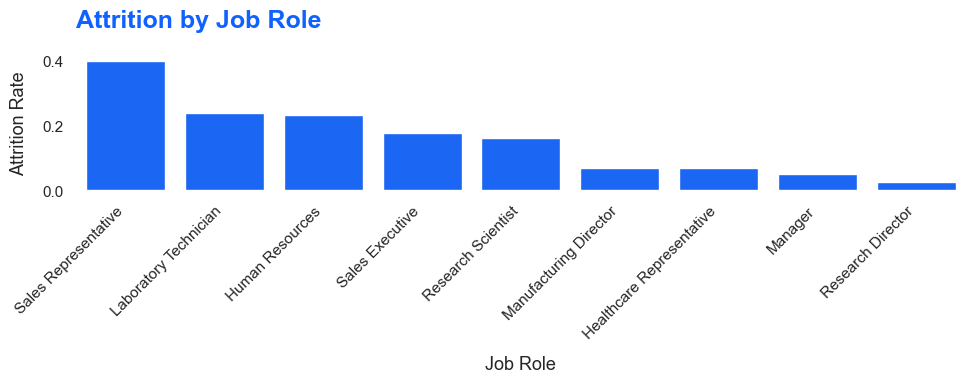

In [40]:
# Sort data for better visuals (optional)
jobrole_attrition_sorted = job_role_attrition.sort_values(by='Attrition', ascending=False)

# Set minimalist style
sns.set_theme(style="white")

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 4), facecolor='white')

# IBM blue color
ibm_blue = '#0f62fe'

# Plot bars with IBM blue and white edges
barplot = sns.barplot(
    data=jobrole_attrition_sorted,
    x='JobRole',
    y='Attrition',
    color=ibm_blue,
    edgecolor='white',
    linewidth=1,
    saturation=0.9,
    ax=ax
)

# Remove grid and spines for minimalist style
sns.despine(left=True, bottom=True)
barplot.set_axisbelow(True)

# Modern typography and colors
plt.title('Attrition by Job Role', fontsize=18, fontweight='bold', loc='left', pad=20, color=ibm_blue)
plt.ylabel('Attrition Rate', fontsize=13, labelpad=10)
plt.xlabel('Job Role', fontsize=13, labelpad=10)

# Rotate job role names for readability
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)

# Remove left axis line for minimalist finish
barplot.spines['left'].set_visible(False)

# Adjust layout for balanced whitespace
plt.tight_layout()

# Show the plot
plt.show()

- 5. Display the average age at which employees leave by job role

In [41]:
average_age_by_job_role = attrition[attrition['Attrition'] == 1].groupby('JobRole')['Age'].mean().reset_index()
average_age_by_job_role.sort_values(by="Age", ascending=False)

,JobRole,Age
5,Research Director,49.500000
3,Manager,46.400000
4,Manufacturing Director,39.300000
0,Healthcare Representative,38.888889
7,Sales Executive,37.508772
6,Research Scientist,32.510638
2,Laboratory Technician,31.403226
1,Human Resources,30.083333
8,Sales Representative,27.787879


 - Extra: which department and job role would you target to reduce the attrition rate?

The criteria to choose which department and job role should be targeted depends on the business needs and company culture, among other factors. Therefore, taking into consideration the data present, actions are needed to keep:
    
- Employees from departments and positions with overload (measured by overtime).
- Employees with positions that have higher training levels (measure by training last year) stay in the company. Training is an investment for the company and employees that are trained must be retained.
- Employees that have recently entered in the company do not leave. If this is happening it is a sign something is wrong and measures should be taken.

In [43]:
Department_results = attrition.groupby('Department')['Attrition'].mean().reset_index()
Department_results.sort_values(by="Attrition", ascending=False, inplace=True)

<font color='##061727'>
The Sales department is the department with the highest level of attrition, followed by the Resources department. On average, the Sales department has the lowest level of job involvement, highest level of training time, highest number of years at the company, highest number of years in the current role, and highest number of years since last promotion.

In [44]:
JobRole_results = attrition.groupby('JobRole')['Attrition'].mean().reset_index()
JobRole_results.sort_values(by="Attrition", ascending=False)

,JobRole,Attrition
8,Sales Representative,0.397590
2,Laboratory Technician,0.239382
1,Human Resources,0.230769
7,Sales Executive,0.174847
6,Research Scientist,0.160959
4,Manufacturing Director,0.068966
0,Healthcare Representative,0.068702
3,Manager,0.049020
5,Research Director,0.025000


<font color='##061727'>
The Sales Representative is the job role with the highest level of attrition. The level of attrition for this job role is considerably higher compared to the second highest job role attrition average number. On average, the Sales Representative positive has less work experience (Total Working Years) and younger employees compared to all other job roles, the highest number of training and the lowest time in the company.

In [45]:
attrition['OverTime'] = (attrition['OverTime'] == 'Yes').astype(int)
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [46]:
OverTime_Department = attrition.groupby('Department')['OverTime'].mean().reset_index()
OverTime_Department.sort_values(by="OverTime", ascending=False) 

,Department,OverTime
2,Sales,0.286996
1,Research & Development,0.281998
0,Human Resources,0.269841


<font color='##061727'>
The Sales department is the department with the highest number of employees working overtime, followed by Research & Development. Nevertheless, the difference between the three doesnt seem to be relevant.

In [47]:
OverTime_JobRole = attrition.groupby('JobRole')['OverTime'].mean().reset_index()
OverTime_JobRole.sort_values(by="OverTime", ascending=False) 

,JobRole,OverTime
6,Research Scientist,0.332192
8,Sales Representative,0.289157
7,Sales Executive,0.288344
5,Research Director,0.287500
0,Healthcare Representative,0.282443
4,Manufacturing Director,0.268966
3,Manager,0.264706
1,Human Resources,0.250000
2,Laboratory Technician,0.239382


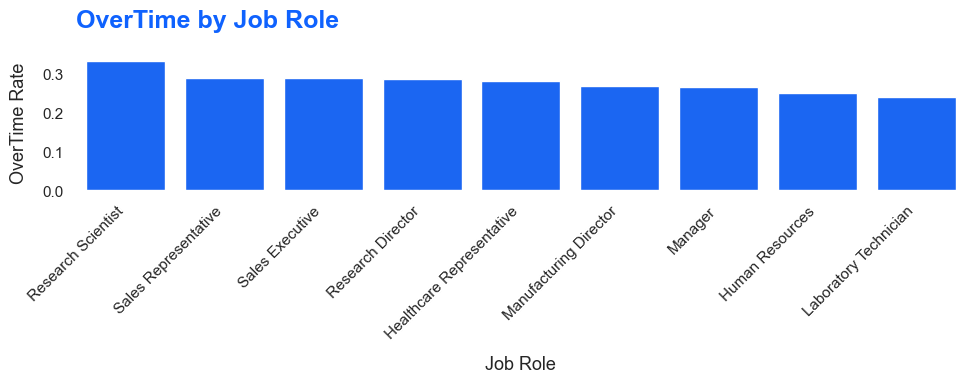

In [48]:
# Sort data for better visuals (optional)
overtime_jobrole_sorted = OverTime_JobRole.sort_values(by='OverTime', ascending=False)

# Set minimalist style
sns.set_theme(style="white")

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 4), facecolor='white')

# IBM blue color
ibm_blue = '#0f62fe'

# Plot bars with IBM blue and white edges
barplot = sns.barplot(
    data=overtime_jobrole_sorted,
    x='JobRole',
    y='OverTime',
    color=ibm_blue,
    edgecolor='white',
    linewidth=1,
    saturation=0.9,
    ax=ax
)

# Remove grid and spines for minimalist style
sns.despine(left=True, bottom=True)
barplot.set_axisbelow(True)

# Modern typography and colors
plt.title('OverTime by Job Role', fontsize=18, fontweight='bold', loc='left', pad=20, color=ibm_blue)
plt.ylabel('OverTime Rate', fontsize=13, labelpad=10)
plt.xlabel('Job Role', fontsize=13, labelpad=10)

# Rotate job role names for readability
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)

# Remove left axis line for minimalist finish
barplot.spines['left'].set_visible(False)

# Adjust layout for balanced whitespace
plt.tight_layout()

# Show the plot
plt.show()


<font color='##061727'>
The Research Scientis position is the department with the highest number of employees working overtime. 

<font color='##061727'>
Up to now, it is clear that either the Sales department or the Research one should be targeted. And Sales Representative seems to be the role to target, since it has the highest level of attrition and the second highest level of overtime.

In [49]:
Training_JobRole = attrition.groupby('JobRole')['TrainingTimesLastYear'].mean().reset_index()
Training_JobRole.sort_values(by="TrainingTimesLastYear", ascending=False)

,JobRole,TrainingTimesLastYear
8,Sales Representative,3.012048
2,Laboratory Technician,2.949807
7,Sales Executive,2.831288
3,Manager,2.813725
5,Research Director,2.775000
0,Healthcare Representative,2.748092
4,Manufacturing Director,2.744828
6,Research Scientist,2.664384
1,Human Resources,2.557692


In [50]:
Training_Department = attrition.groupby('Department')['TrainingTimesLastYear'].mean().reset_index()
Training_Department.sort_values(by="TrainingTimesLastYear", ascending=False)

,Department,TrainingTimesLastYear
2,Sales,2.847534
1,Research & Development,2.792924
0,Human Resources,2.555556


<font color='##061727'>
According to the Training time, we would want to keep mainly job roles from the Sales department. 

In [51]:
YearsAtCompany_JobRole = attrition.groupby('JobRole')['YearsAtCompany'].mean().reset_index()
YearsAtCompany_JobRole.sort_values(by="YearsAtCompany", ascending=True) 

,JobRole,YearsAtCompany
8,Sales Representative,2.915663
2,Laboratory Technician,5.019305
6,Research Scientist,5.113014
1,Human Resources,5.326923
7,Sales Executive,7.496933
4,Manufacturing Director,7.600000
0,Healthcare Representative,8.374046
5,Research Director,10.937500
3,Manager,14.431373


In [52]:
YearsAtCompany_JobRole = attrition[attrition['Attrition'] == 1].groupby('JobRole')['YearsAtCompany'].mean().reset_index()
YearsAtCompany_JobRole.sort_values(by="YearsAtCompany", ascending=True)

,JobRole,YearsAtCompany
8,Sales Representative,2.090909
2,Laboratory Technician,3.161290
1,Human Resources,4.166667
6,Research Scientist,4.319149
7,Sales Executive,6.701754
4,Manufacturing Director,8.700000
0,Healthcare Representative,10.888889
3,Manager,15.600000
5,Research Director,26.500000


In [53]:
YearsAtCompany_Department = attrition.groupby('Department')['YearsAtCompany'].mean().reset_index()
YearsAtCompany_Department.sort_values(by="YearsAtCompany", ascending=True) 

,Department,YearsAtCompany
1,Research & Development,6.864724
0,Human Resources,7.238095
2,Sales,7.284753


In [54]:
YearsAtCompany_Department = attrition[attrition['Attrition'] == 1].groupby('Department')['YearsAtCompany'].mean().reset_index()
YearsAtCompany_Department.sort_values(by="YearsAtCompany", ascending=True)

,Department,YearsAtCompany
0,Human Resources,4.166667
1,Research & Development,4.954887
2,Sales,5.510870


In [55]:
JobRole_EmployeeCount = attrition.groupby('JobRole')['EmployeeCount'].sum().reset_index()
JobRole_EmployeeCount.sort_values(by="EmployeeCount", ascending=False)

,JobRole,EmployeeCount
7,Sales Executive,326
6,Research Scientist,292
2,Laboratory Technician,259
4,Manufacturing Director,145
0,Healthcare Representative,131
3,Manager,102
8,Sales Representative,83
5,Research Director,80
1,Human Resources,52


In [56]:
Dep_EmployeeCount = attrition.groupby('Department')['EmployeeCount'].sum().reset_index()
Dep_EmployeeCount.sort_values(by="EmployeeCount", ascending=True)

,Department,EmployeeCount
0,Human Resources,63
2,Sales,446
1,Research & Development,961


In [57]:
JobLevel_JobRole = attrition.groupby('JobRole')['JobLevel'].mean().reset_index()
JobLevel_JobRole.sort_values(by="JobLevel", ascending=False)

,JobRole,JobLevel
3,Manager,4.303922
5,Research Director,3.975000
0,Healthcare Representative,2.473282
4,Manufacturing Director,2.448276
7,Sales Executive,2.328221
1,Human Resources,1.480769
2,Laboratory Technician,1.239382
6,Research Scientist,1.202055
8,Sales Representative,1.084337


In [58]:
MonthlyIncome_JobRole = attrition.groupby('JobRole')['MonthlyIncome'].mean().reset_index()
MonthlyIncome_JobRole.sort_values(by="MonthlyIncome", ascending=False)

,JobRole,MonthlyIncome
3,Manager,17181.676471
5,Research Director,16033.550000
0,Healthcare Representative,7528.763359
4,Manufacturing Director,7295.137931
7,Sales Executive,6924.279141
1,Human Resources,4235.750000
6,Research Scientist,3239.972603
2,Laboratory Technician,3237.169884
8,Sales Representative,2626.000000


In [59]:
MonthlyIncome_Department = attrition.groupby('Department')['MonthlyIncome'].mean().reset_index()
MonthlyIncome_Department.sort_values(by="MonthlyIncome", ascending=False)

,Department,MonthlyIncome
2,Sales,6959.172646
0,Human Resources,6654.507937
1,Research & Development,6281.252862


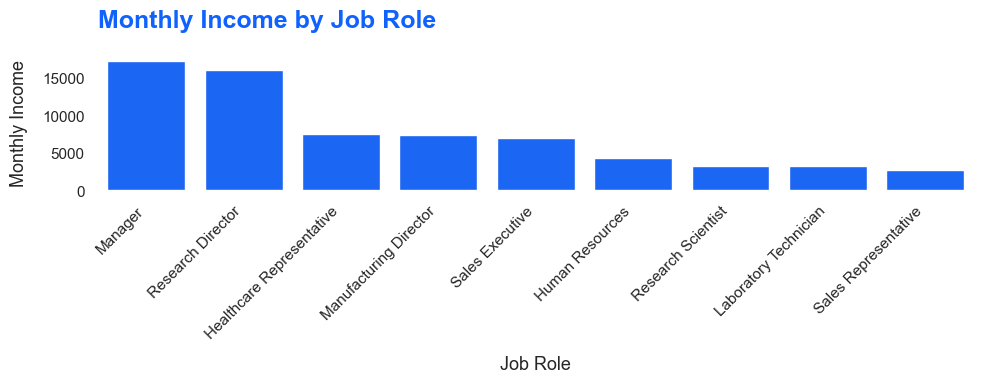

In [60]:
# Sort data for better visuals (optional)
monthlyincome_jobrole_sorted = MonthlyIncome_JobRole.sort_values(by='MonthlyIncome', ascending=False)

# Set minimalist style
sns.set_theme(style="white")

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 4), facecolor='white')

# IBM blue color
ibm_blue = '#0f62fe'

# Plot bars with IBM blue and white edges
barplot = sns.barplot(
    data=monthlyincome_jobrole_sorted,
    x='JobRole',
    y='MonthlyIncome',
    color=ibm_blue,
    edgecolor='white',
    linewidth=1,
    saturation=0.9,
    ax=ax
)

# Remove grid and spines for minimalist style
sns.despine(left=True, bottom=True)
barplot.set_axisbelow(True)

# Modern typography and colors
plt.title('Monthly Income by Job Role', fontsize=18, fontweight='bold', loc='left', pad=20, color=ibm_blue)
plt.ylabel('Monthly Income', fontsize=13, labelpad=10)
plt.xlabel('Job Role', fontsize=13, labelpad=10)

# Rotate job role names for readability
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)

# Remove left axis line for minimalist finish
barplot.spines['left'].set_visible(False)

# Adjust layout for balanced whitespace
plt.tight_layout()

# Show the plot
plt.show()


In [61]:
job_roles_by_department = attrition.groupby('Department')['JobRole'].unique()
job_roles_by_department

Department
Human Resources                                  [Human Resources, Manager]
Research & Development    [Research Scientist, Laboratory Technician, Ma...
Sales                      [Sales Executive, Manager, Sales Representative]
Name: JobRole, dtype: object

<font color='##061727'>
More variables could be used to make this analysis, nevertheless I believe there is strong evidence that the Sales department and the Sales Representative role should be targeted with measures to reduce attrition. The sales department has the highest attrition level and a higher percentage of overtime, which could be a reason for alarm. Apart from that, the Sales Representive has shown to be the department with the worst scores. It is the position with the higher level of attrition and higher number of training, meaning the company is investing on these employees only for them to leave. Also, most of these employees have the lowest monhtly income which can be associated to their incentives to leave the company. The gap between their salary and the sales executive is significant. There could be some problems in the way the department is managed and organized, since the difference between the number of representatives and executives is high.
    This said, having more infomation about the company culture and management decisions could be more informative regarding the type of measures to be applied.

## Data preparation

Since there are a lot of categorical variables, we need to encode them using [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) or [label encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

1. Find which are the categorical variables and which are the numerical variables
    1. There are "fake" numerical variables, since they contain numbers but they represent categories. For example, "Education" is a number between 1 and 5, but it represents the level of education of the employee. These variables can only be found by looking at the description of the dataset.
    2. A purely numerical variable is "Age", since it is a number that represents the age of the employee


2. Split the dataset into a training set and a test set using `stratify` to make sure the proportion of employees who left and stayed is the same in both sets

3. For each `x_train` and `x_test` separate the categorical variables from the numerical variables into the following datasets:
    1. `x_train_cat` and `x_test_cat` for the categorical variables
    2. `x_train_num` and `x_test_num` for the numerical variables

4. Encode the categorical variables using [One-Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
    1. Train your encoder on the training set: `encoder.fit(x_train_cat)`
    2. Transform the training set: `x_train_cat_encoded = encoder.transform(x_train_cat)`
    3. Transform the test set: `x_test_cat_encoded = encoder.transform(x_test_cat)`

5. Scale the numerical variables using [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
    1. Train your scaler on the training set: `scaler.fit(x_train_num)`
    2. Transform the training set: `x_train_num_scaled = scaler.transform(x_train_num)`
    3. Transform the test set: `x_test_num_scaled = scaler.transform(x_test_num)`

6. Concatenate the categorical and numerical variables for both the training set and the test set
    * Make sure you use `reset_index(drop=True)` to reset the index of the categorical and numerical variables before concatenating them

7. Encode the target variable "Attrition" with LabelEncoder

In [63]:
attrition.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

- 1. Find which are the categorical variables and which are the numerical variables
There are "fake" numerical variables, since they contain numbers but they represent categories. 
    - For example, "Education" is a number between 1 and 5, but it represents the level of education of the employee. These variables can only be found by looking at the description of the dataset.
    - A purely numerical variable is "Age", since it is a number that represents the age of the employee

In [64]:
#Check the data types (Categorical=object,int64 or float64 = Numerical)
attrition.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [65]:
#Convert the 'fake' numerical variables into categorical and check if it worked
attrition[['Education',
            'EnvironmentSatisfaction',
            'JobInvolvement',
            'JobSatisfaction',
            'PerformanceRating',
            'RelationshipSatisfaction',
            'WorkLifeBalance']] = attrition[['Education',
                                             'EnvironmentSatisfaction',
                                             'JobInvolvement',
                                             'JobSatisfaction',
                                             'PerformanceRating',
                                             'RelationshipSatisfaction',
                                             'WorkLifeBalance']].astype('category')
attrition.dtypes

Age                            int64
Attrition                     object
BusinessTravel                object
DailyRate                      int64
Department                    object
DistanceFromHome               int64
Education                   category
EducationField                object
EmployeeCount                  int64
EmployeeNumber                 int64
EnvironmentSatisfaction     category
Gender                        object
HourlyRate                     int64
JobInvolvement              category
JobLevel                       int64
JobRole                       object
JobSatisfaction             category
MaritalStatus                 object
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
Over18                        object
OverTime                      object
PercentSalaryHike              int64
PerformanceRating           category
RelationshipSatisfaction    category
StandardHours                  int64
S

In [66]:
#For the sake of visualization... 
attrition.select_dtypes(include=['int64', 'float64']).columns
attrition.select_dtypes(include=['category','object']).columns

Index(['Attrition', 'BusinessTravel', 'Department', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime',
       'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance'],
      dtype='object')

- 2. Split the dataset into a training set and a test set using stratify to make sure the proportion of employees who left and stayed is the same in both sets

In [67]:
from sklearn.model_selection import train_test_split

X = attrition.drop(columns=['Attrition'])
y = attrition['Attrition'] 

X_train, X_test, y_train, y_test = train_test_split(
    X, y,               
    test_size=0.3,      
    random_state=1234,   
    shuffle=True,      
    stratify=y       
)

In [68]:
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [69]:
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [70]:
X_train.shape

(1029, 34)

In [71]:
X_test.shape

(441, 34)

In [72]:
441/(1029+441)

0.3

In [73]:
y_train.value_counts(1)

Attrition
No     0.838678
Yes    0.161322
Name: proportion, dtype: float64

In [74]:
y_test.value_counts(1)

Attrition
No     0.839002
Yes    0.160998
Name: proportion, dtype: float64

<font color='##061727'>
The 70/30 split and the stratify parameter to ensure the same proportion of results was successful.

- 3. For each x_train and x_test separate the categorical variables from the numerical variables into the following datasets:
    - x_train_cat and x_test_cat for the categorical variables
    - x_train_num and x_test_num for the numerical variables

In [75]:
X_train_cat = X_train.select_dtypes(include=['category', 'object'])
X_train_cat

,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
1244,Travel_Frequently,Research & Development,4,Technical Degree,4,Female,2,Research Scientist,1,Single,Y,No,3,4,3
947,Travel_Rarely,Sales,3,Life Sciences,2,Male,3,Sales Executive,2,Single,Y,Yes,3,3,2
261,Non-Travel,Sales,2,Life Sciences,4,Male,2,Sales Executive,4,Married,Y,No,3,4,3
1195,Travel_Rarely,Research & Development,3,Life Sciences,3,Male,3,Manager,3,Single,Y,No,3,1,3
1032,Non-Travel,Research & Development,3,Life Sciences,1,Female,2,Laboratory Technician,1,Single,Y,Yes,4,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,Travel_Rarely,Research & Development,3,Medical,4,Female,3,Healthcare Representative,4,Married,Y,Yes,3,3,1
1071,Travel_Rarely,Research & Development,2,Medical,3,Female,2,Laboratory Technician,1,Married,Y,No,4,1,3
1092,Travel_Rarely,Research & Development,3,Technical Degree,4,Male,3,Research Scientist,4,Married,Y,No,4,4,3
263,Travel_Rarely,Sales,3,Technical Degree,3,Female,1,Manager,2,Married,Y,Yes,3,2,2


In [76]:
X_test_cat = X_test.select_dtypes(include=['category', 'object'])
X_test_cat

,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
298,Travel_Frequently,Research & Development,4,Life Sciences,3,Male,4,Laboratory Technician,4,Married,Y,No,3,4,3
625,Travel_Rarely,Sales,3,Marketing,4,Male,3,Sales Executive,1,Divorced,Y,Yes,3,3,3
1349,Travel_Rarely,Research & Development,2,Life Sciences,2,Female,2,Research Scientist,3,Married,Y,Yes,3,3,2
1361,Travel_Frequently,Research & Development,3,Other,3,Male,4,Laboratory Technician,4,Married,Y,No,3,1,3
343,Travel_Rarely,Sales,1,Marketing,4,Female,2,Sales Executive,2,Divorced,Y,Yes,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,Travel_Frequently,Sales,4,Marketing,1,Male,3,Sales Executive,4,Married,Y,Yes,3,3,3
305,Non-Travel,Research & Development,4,Life Sciences,2,Female,3,Laboratory Technician,2,Married,Y,No,3,3,3
1256,Travel_Frequently,Research & Development,2,Medical,3,Female,2,Laboratory Technician,2,Married,Y,No,3,2,2
553,Travel_Rarely,Research & Development,1,Medical,4,Female,2,Research Scientist,4,Single,Y,Yes,4,4,2


In [77]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])
X_train_num

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1244,30,1312,2,1,1745,78,1,4968,26427,0,16,80,0,10,2,9,7,0,7
947,52,1030,5,1,1319,64,3,8446,21534,9,19,80,0,10,2,8,7,7,7
261,38,1327,2,1,361,39,2,5249,19682,3,18,80,1,13,0,8,7,7,5
1195,49,809,1,1,1677,36,4,15379,22384,4,14,80,0,23,2,8,7,0,0
1032,39,592,2,1,1458,54,1,3646,17181,2,23,80,0,11,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,31,616,12,1,961,41,2,5855,17369,0,11,80,2,10,2,9,7,8,5
1071,49,271,3,1,1509,43,2,4789,23070,4,25,80,1,10,3,3,2,1,2
1092,45,950,28,1,1546,97,1,2132,4585,4,20,80,1,8,3,5,4,0,3
263,46,488,2,1,363,75,4,16872,14977,3,12,80,1,28,2,7,7,7,7


In [78]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])
X_test_num

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
298,36,566,18,1,407,81,1,3688,7122,4,18,80,2,4,2,1,0,0,0
625,45,930,9,1,864,74,3,10761,19239,4,12,80,1,18,2,5,4,0,2
1349,26,482,1,1,1893,90,1,2933,14908,1,13,80,1,1,3,1,0,1,0
1361,26,1096,6,1,1918,61,1,2544,7102,0,18,80,1,8,3,7,7,7,7
343,29,144,10,1,463,39,2,8268,11866,1,14,80,2,7,2,7,7,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,31,754,26,1,1967,63,2,5617,21075,1,11,80,0,10,4,10,7,0,8
305,36,1105,24,1,419,47,2,5674,6927,7,15,80,1,11,3,9,8,0,8
1256,38,594,2,1,1760,75,1,2468,15963,4,14,80,1,9,4,6,1,0,5
553,40,804,2,1,763,86,1,2342,22929,0,20,80,0,5,2,4,2,2,3


- 4. Encode the categorical variables using One-Hot Encoding
    - Train your encoder on the training set: encoder.fit(x_train_cat)
    - Transform the training set: x_train_cat_encoded = encoder.transform(x_train_cat)
    - Transform the test set: x_test_cat_encoded = encoder.transform(x_test_cat)

In [79]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories='auto')

In [80]:
X_test_cat

,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
298,Travel_Frequently,Research & Development,4,Life Sciences,3,Male,4,Laboratory Technician,4,Married,Y,No,3,4,3
625,Travel_Rarely,Sales,3,Marketing,4,Male,3,Sales Executive,1,Divorced,Y,Yes,3,3,3
1349,Travel_Rarely,Research & Development,2,Life Sciences,2,Female,2,Research Scientist,3,Married,Y,Yes,3,3,2
1361,Travel_Frequently,Research & Development,3,Other,3,Male,4,Laboratory Technician,4,Married,Y,No,3,1,3
343,Travel_Rarely,Sales,1,Marketing,4,Female,2,Sales Executive,2,Divorced,Y,Yes,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,Travel_Frequently,Sales,4,Marketing,1,Male,3,Sales Executive,4,Married,Y,Yes,3,3,3
305,Non-Travel,Research & Development,4,Life Sciences,2,Female,3,Laboratory Technician,2,Married,Y,No,3,3,3
1256,Travel_Frequently,Research & Development,2,Medical,3,Female,2,Laboratory Technician,2,Married,Y,No,3,2,2
553,Travel_Rarely,Research & Development,1,Medical,4,Female,2,Research Scientist,4,Single,Y,Yes,4,4,2


<font color='##061727'>
I realized the 'fake' numerical once encoded and converted the columns values into the categories would give me columns with a bunch of numbers.Therefore I have decided to substitute the value by its meaning before encoding the variables

In [81]:
#Train

# Replace for Education
X_train_cat['Education'] = X_train_cat['Education'].replace(1, 'Below College')
X_train_cat['Education'] = X_train_cat['Education'].replace(2, 'College')
X_train_cat['Education'] = X_train_cat['Education'].replace(3, 'Bachelor')
X_train_cat['Education'] = X_train_cat['Education'].replace(4, 'Master')
X_train_cat['Education'] = X_train_cat['Education'].replace(5, 'Doctor')

# Replace for EnvironmentSatisfaction
X_train_cat['EnvironmentSatisfaction'] = X_train_cat['EnvironmentSatisfaction'].replace(1, 'ES Low')
X_train_cat['EnvironmentSatisfaction'] = X_train_cat['EnvironmentSatisfaction'].replace(2, 'ES Medium')
X_train_cat['EnvironmentSatisfaction'] = X_train_cat['EnvironmentSatisfaction'].replace(3, 'ES High')
X_train_cat['EnvironmentSatisfaction'] = X_train_cat['EnvironmentSatisfaction'].replace(4, 'ES Very High')

# Replace for JobInvolvement
X_train_cat['JobInvolvement'] = X_train_cat['JobInvolvement'].replace(1, 'JI Low')
X_train_cat['JobInvolvement'] = X_train_cat['JobInvolvement'].replace(2, 'JI Medium')
X_train_cat['JobInvolvement'] = X_train_cat['JobInvolvement'].replace(3, 'JI High')
X_train_cat['JobInvolvement'] = X_train_cat['JobInvolvement'].replace(4, 'JI Very High')

# Replace for JobSatisfaction
X_train_cat['JobSatisfaction'] = X_train_cat['JobSatisfaction'].replace(1, 'JS Low')
X_train_cat['JobSatisfaction'] = X_train_cat['JobSatisfaction'].replace(2, 'JS Medium')
X_train_cat['JobSatisfaction'] = X_train_cat['JobSatisfaction'].replace(3, 'JS High')
X_train_cat['JobSatisfaction'] = X_train_cat['JobSatisfaction'].replace(4, 'JS Very High')

# Replace for PerformanceRating
X_train_cat['PerformanceRating'] = X_train_cat['PerformanceRating'].replace(1, 'PR Low')
X_train_cat['PerformanceRating'] = X_train_cat['PerformanceRating'].replace(2, 'PR Good')
X_train_cat['PerformanceRating'] = X_train_cat['PerformanceRating'].replace(3, 'PR Excellent')
X_train_cat['PerformanceRating'] = X_train_cat['PerformanceRating'].replace(4, 'PR Outstanding')

# Replace for RelationshipSatisfaction
X_train_cat['RelationshipSatisfaction'] = X_train_cat['RelationshipSatisfaction'].replace(1, 'RS Low')
X_train_cat['RelationshipSatisfaction'] = X_train_cat['RelationshipSatisfaction'].replace(2, 'RS Medium')
X_train_cat['RelationshipSatisfaction'] = X_train_cat['RelationshipSatisfaction'].replace(3, 'RS High')
X_train_cat['RelationshipSatisfaction'] = X_train_cat['RelationshipSatisfaction'].replace(4, 'RS Very High')

# Replace for WorkLifeBalance
X_train_cat['WorkLifeBalance'] = X_train_cat['WorkLifeBalance'].replace(1, 'WLB Bad')
X_train_cat['WorkLifeBalance'] = X_train_cat['WorkLifeBalance'].replace(2, 'WLB Good')
X_train_cat['WorkLifeBalance'] = X_train_cat['WorkLifeBalance'].replace(3, 'WLB Better')
X_train_cat['WorkLifeBalance'] = X_train_cat['WorkLifeBalance'].replace(4, 'WLB Best')

#Test

# Replace for Education
X_test_cat['Education'] = X_test_cat['Education'].replace(1,'Below College')
X_test_cat['Education'] = X_test_cat['Education'].replace(2,'College')
X_test_cat['Education'] = X_test_cat['Education'].replace(3,'Bachelor')
X_test_cat['Education'] = X_test_cat['Education'].replace(4,'Master')
X_test_cat['Education'] = X_test_cat['Education'].replace(5,'Doctor')

#Replace for EnvironmentSatisfaction
X_test_cat['EnvironmentSatisfaction'] = X_test_cat['EnvironmentSatisfaction'].replace(1,'ES Low')
X_test_cat['EnvironmentSatisfaction'] = X_test_cat['EnvironmentSatisfaction'].replace(2,'ES Medium')
X_test_cat['EnvironmentSatisfaction'] = X_test_cat['EnvironmentSatisfaction'].replace(3,'ES High')
X_test_cat['EnvironmentSatisfaction'] = X_test_cat['EnvironmentSatisfaction'].replace(4,'ES Very High')

#Replace for JobInvolvement
X_test_cat['JobInvolvement'] = X_test_cat['JobInvolvement'].replace(1,'JI Low')
X_test_cat['JobInvolvement'] = X_test_cat['JobInvolvement'].replace(2,'JI Medium')
X_test_cat['JobInvolvement'] = X_test_cat['JobInvolvement'].replace(3,'JI High')
X_test_cat['JobInvolvement'] = X_test_cat['JobInvolvement'].replace(4,'JI Very High')

#Replace for JobSatisfaction
X_test_cat['JobSatisfaction'] = X_test_cat['JobSatisfaction'].replace(1,'JS Low')
X_test_cat['JobSatisfaction'] = X_test_cat['JobSatisfaction'].replace(2,'JS Medium')
X_test_cat['JobSatisfaction'] = X_test_cat['JobSatisfaction'].replace(3,'JS High')
X_test_cat['JobSatisfaction'] = X_test_cat['JobSatisfaction'].replace(4,'JS Very High')

#Replace for PerformanceRating
X_test_cat['PerformanceRating'] = X_test_cat['PerformanceRating'].replace(1,'PR Low')
X_test_cat['PerformanceRating'] = X_test_cat['PerformanceRating'].replace(2,'PR Good')
X_test_cat['PerformanceRating'] = X_test_cat['PerformanceRating'].replace(3,'PR Excellent')
X_test_cat['PerformanceRating'] = X_test_cat['PerformanceRating'].replace(4,'PR Outstanding')

#Replace for RelationshipSatisfaction
X_test_cat['RelationshipSatisfaction'] = X_test_cat['RelationshipSatisfaction'].replace(1,'RS Low')
X_test_cat['RelationshipSatisfaction'] = X_test_cat['RelationshipSatisfaction'].replace(2,'RS Medium')
X_test_cat['RelationshipSatisfaction'] = X_test_cat['RelationshipSatisfaction'].replace(3,'RS High')
X_test_cat['RelationshipSatisfaction'] = X_test_cat['RelationshipSatisfaction'].replace(4,'RS Very High')

#Replace for WorkLifeBalance
X_test_cat['WorkLifeBalance'] = X_test_cat['WorkLifeBalance'].replace(1,'WLB Bad')
X_test_cat['WorkLifeBalance'] = X_test_cat['WorkLifeBalance'].replace(2,'WLB Good')
X_test_cat['WorkLifeBalance'] = X_test_cat['WorkLifeBalance'].replace(3,'WLB Better')
X_test_cat['WorkLifeBalance'] = X_test_cat['WorkLifeBalance'].replace(4,'WLB Best')


In [82]:
# Step 2: Train the encoder on the training set
encoder.fit(X_train_cat)

# Step 3: Transform the training set using the same encoder
X_train_cat_encoded = encoder.transform(X_train_cat).toarray()

# Step 4: Transform the test set using the same encoder
X_test_cat_encoded = encoder.transform(X_test_cat).toarray()

In [ ]:
#Check the operation
X_test_cat_encoded.shape

(441, 56)

In [83]:
X_train_cat_encoded

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.]], shape=(1029, 56))

In [84]:
encoder.categories_

[array(['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'], dtype=object),
 array(['Human Resources', 'Research & Development', 'Sales'], dtype=object),
 array(['Bachelor', 'Below College', 'College', 'Doctor', 'Master'],
       dtype=object),
 array(['Human Resources', 'Life Sciences', 'Marketing', 'Medical',
        'Other', 'Technical Degree'], dtype=object),
 array(['ES High', 'ES Low', 'ES Medium', 'ES Very High'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['JI High', 'JI Low', 'JI Medium', 'JI Very High'], dtype=object),
 array(['Healthcare Representative', 'Human Resources',
        'Laboratory Technician', 'Manager', 'Manufacturing Director',
        'Research Director', 'Research Scientist', 'Sales Executive',
        'Sales Representative'], dtype=object),
 array(['JS High', 'JS Low', 'JS Medium', 'JS Very High'], dtype=object),
 array(['Divorced', 'Married', 'Single'], dtype=object),
 array(['Y'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 ar

In [85]:
#Source:https://www.youtube.com/watch?v=InZ0n2knz1E
cat_features_label=encoder.categories_

In [86]:
cat_features_label

[array(['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'], dtype=object),
 array(['Human Resources', 'Research & Development', 'Sales'], dtype=object),
 array(['Bachelor', 'Below College', 'College', 'Doctor', 'Master'],
       dtype=object),
 array(['Human Resources', 'Life Sciences', 'Marketing', 'Medical',
        'Other', 'Technical Degree'], dtype=object),
 array(['ES High', 'ES Low', 'ES Medium', 'ES Very High'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['JI High', 'JI Low', 'JI Medium', 'JI Very High'], dtype=object),
 array(['Healthcare Representative', 'Human Resources',
        'Laboratory Technician', 'Manager', 'Manufacturing Director',
        'Research Director', 'Research Scientist', 'Sales Executive',
        'Sales Representative'], dtype=object),
 array(['JS High', 'JS Low', 'JS Medium', 'JS Very High'], dtype=object),
 array(['Divorced', 'Married', 'Single'], dtype=object),
 array(['Y'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 ar

In [87]:
#Convert the several arrays into one single array

#1 -  This method didnt work
import numpy as np
np.array(cat_features_label,dtype=object).ravel()
#2 - This method worked
cat_features_label = np.concatenate(cat_features_label)
cat_features_label

array(['Non-Travel', 'Travel_Frequently', 'Travel_Rarely',
       'Human Resources', 'Research & Development', 'Sales', 'Bachelor',
       'Below College', 'College', 'Doctor', 'Master', 'Human Resources',
       'Life Sciences', 'Marketing', 'Medical', 'Other',
       'Technical Degree', 'ES High', 'ES Low', 'ES Medium',
       'ES Very High', 'Female', 'Male', 'JI High', 'JI Low', 'JI Medium',
       'JI Very High', 'Healthcare Representative', 'Human Resources',
       'Laboratory Technician', 'Manager', 'Manufacturing Director',
       'Research Director', 'Research Scientist', 'Sales Executive',
       'Sales Representative', 'JS High', 'JS Low', 'JS Medium',
       'JS Very High', 'Divorced', 'Married', 'Single', 'Y', 'No', 'Yes',
       'PR Excellent', 'PR Outstanding', 'RS High', 'RS Low', 'RS Medium',
       'RS Very High', 'WLB Bad', 'WLB Best', 'WLB Better', 'WLB Good'],
      dtype=object)

In [88]:
X_train_cat_encoded=pd.DataFrame(X_train_cat_encoded,columns=cat_features_label)

In [89]:
X_test_cat_encoded = pd.DataFrame(X_test_cat_encoded,columns=cat_features_label)
X_test_cat_encoded 

,Non-Travel,Travel_Frequently,Travel_Rarely,Human Resources,Research & Development,Sales,Bachelor,Below College,College,Doctor,...,PR Excellent,PR Outstanding,RS High,RS Low,RS Medium,RS Very High,WLB Bad,WLB Best,WLB Better,WLB Good
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
437,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
438,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
439,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


- 5. Scale the numerical variables using StandardScaler
    - Train your scaler on the training set: scaler.fit(x_train_num)
    - Transform the training set: x_train_num_scaled = scaler.transform(x_train_num)
    - Transform the test set: x_test_num_scaled = scaler.transform(x_test_num)

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
X_test_num

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
298,36,566,18,1,407,81,1,3688,7122,4,18,80,2,4,2,1,0,0,0
625,45,930,9,1,864,74,3,10761,19239,4,12,80,1,18,2,5,4,0,2
1349,26,482,1,1,1893,90,1,2933,14908,1,13,80,1,1,3,1,0,1,0
1361,26,1096,6,1,1918,61,1,2544,7102,0,18,80,1,8,3,7,7,7,7
343,29,144,10,1,463,39,2,8268,11866,1,14,80,2,7,2,7,7,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,31,754,26,1,1967,63,2,5617,21075,1,11,80,0,10,4,10,7,0,8
305,36,1105,24,1,419,47,2,5674,6927,7,15,80,1,11,3,9,8,0,8
1256,38,594,2,1,1760,75,1,2468,15963,4,14,80,1,9,4,6,1,0,5
553,40,804,2,1,763,86,1,2342,22929,0,20,80,0,5,2,4,2,2,3


In [92]:
scl = StandardScaler()

In [93]:
#Train the scaler on the training set
scl.fit(X_train_num)

#Transform the training set
X_train_num_scaled = scl.transform(X_train_num)

#Transform the test set
X_test_num_scaled = scl.transform(X_test_num)

In [94]:
X_train_num_scaled

array([[-0.7925502 ,  1.24772929, -0.88830134, ...,  0.80257793,
        -0.67792875,  0.83723939],
       [ 1.61380058,  0.55473555, -0.51178257, ...,  0.80257793,
         1.46567125,  0.83723939],
       [ 0.08248645,  1.28459066, -0.88830134, ...,  0.80257793,
         1.46567125,  0.27267888],
       ...,
       [ 0.84814352,  0.35814158,  2.37486139, ..., -0.03955602,
        -0.67792875, -0.29188162],
       [ 0.9575231 , -0.7771886 , -0.88830134, ...,  0.80257793,
         1.46567125,  0.83723939],
       [-1.23006853,  0.45889599, -0.38627631, ..., -0.60097864,
        -0.67792875, -0.57416188]], shape=(1029, 19))

In [95]:
# The result is returned as a numpy array, so let's convert it again to a Pandas Df
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=X_train_num.columns)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=X_test_num.columns)

In [96]:
#Checking the mean (it should be close to 0)
X_train_num_scaled["Age"].mean()

np.float64(-3.3144850647701466e-16)

In [97]:
#Checking the standard deviation (it should be close to 1)
X_train_num_scaled["Age"].std()

np.float64(1.0004862630970575)

- 6. Concatenate the categorical and numerical variables for both the training set and the test set
    - Make sure you use reset_index(drop=True) to reset the index of the categorical and numerical variables before concatenating them

In [98]:
# This would be the code to reset the index, but in this case it is not necessary
X_train_cat_encoded = X_train_cat_encoded.reset_index(drop=True)
X_test_cat_encoded = X_test_cat_encoded.reset_index(drop=True)

X_train_num_scaled = X_train_num_scaled.reset_index(drop=True)
X_test_num_scaled = X_test_num_scaled.reset_index(drop=True)

In [99]:
# Concatenating the categorical and numerical variables for the training set
X_train_combined = pd.concat([X_train_cat_encoded, X_train_num_scaled], axis=1)

# Concatenating the categorical and numerical variables for the test set
X_test_combined = pd.concat([X_test_cat_encoded, X_test_num_scaled], axis=1)

In [100]:
X_train_combined

,Non-Travel,Travel_Frequently,Travel_Rarely,Human Resources,Research & Development,Sales,Bachelor,Below College,College,Doctor,...,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-1.083262,0.206178,0.0,-0.913324,-0.161134,-0.617933,0.342843,0.802578,-0.677929,0.837239
1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,2.531905,1.015937,0.0,-0.913324,-0.161134,-0.617933,0.177990,0.802578,1.465671,0.837239
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.121794,0.746017,0.0,0.259972,0.226265,-2.170687,0.177990,0.802578,1.465671,0.272679
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.523479,-0.333662,0.0,-0.913324,1.517596,-0.617933,0.177990,0.802578,-0.677929,-1.138722
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,-0.279891,2.095616,0.0,-0.913324,-0.032001,-0.617933,-0.975982,-1.162401,-0.677929,-1.138722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,-1.083262,-1.143421,0.0,1.433268,-0.161134,-0.617933,0.342843,0.802578,1.771900,0.272679
1025,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.523479,2.635456,0.0,0.259972,-0.161134,0.158444,-0.646276,-0.600979,-0.371700,-0.574162
1026,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.523479,1.285857,0.0,0.259972,-0.419400,0.158444,-0.316570,-0.039556,-0.677929,-0.291882
1027,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.121794,-0.873501,0.0,0.259972,2.163262,-0.617933,0.013137,0.802578,1.465671,0.837239


In [101]:
X_test_combined

,Non-Travel,Travel_Frequently,Travel_Rarely,Human Resources,Research & Development,Sales,Bachelor,Below College,College,Doctor,...,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.523479,0.746017,0.0,1.433268,-0.935933,-0.617933,-0.975982,-1.162401,-0.677929,-1.138722
1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.523479,-0.873501,0.0,0.259972,0.871931,-0.617933,-0.316570,-0.039556,-0.677929,-0.574162
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-0.681577,-0.603582,0.0,0.259972,-1.323332,0.158444,-0.975982,-1.162401,-0.371700,-1.138722
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,-1.083262,0.746017,0.0,0.259972,-0.419400,0.158444,0.013137,0.802578,1.465671,0.837239
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,-0.681577,-0.333662,0.0,1.433268,-0.548533,-0.617933,0.013137,0.802578,-0.371700,0.837239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.681577,-1.143421,0.0,-0.913324,-0.161134,0.934821,0.507697,0.802578,-0.677929,1.119520
437,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.728535,-0.063742,0.0,0.259972,-0.032001,0.158444,0.342843,1.083289,-0.677929,1.119520
438,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.523479,-0.333662,0.0,0.259972,-0.290267,0.934821,-0.151716,-0.881690,-0.677929,0.272679
439,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-1.083262,1.285857,0.0,-0.913324,-0.806800,-0.617933,-0.481423,-0.600979,-0.065472,-0.291882


In [102]:
X_test_combined.shape

(441, 75)

In [103]:
X_train_combined.shape

(1029, 75)

- 7. Encode the target variable "Attrition" with LabelEncoder

In [104]:
#Following sklearn documentation
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [105]:
le.fit(y_train)

LabelEncoder()

In [106]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [107]:
list(le.classes_)

['No', 'Yes']

In [108]:
le.transform(list(le.classes_))

array([0, 1])

In [109]:
y_train = le.transform(y_train)

In [110]:
y_train

array([0, 1, 0, ..., 0, 0, 0], shape=(1029,))

In [111]:
y_test = le.transform(y_test)

In [112]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

## Predictive model(s)

Steps:
* Try at least 3 different algorithms from `sklearn` (e.g. Logistic Regression, Decision Tree, Random Forest, SVM, KNN, Naive Bayes, etc.)
* For each algorithm, find the best combination of hyperparameters using `GridSearchVC` trying at least 2 different hyperparameters (e.g. `max_depth` for Decision Tree, `C` for Logistic Regression, etc.)
* Once you have found the best hyperparameters for each algorithm, train each one of them with those parameters, predict on x_test, and display the confusion matrix and the classification report for each algorithm
* Return the accuracy score on the test set of the best algorithm (the one with the highest accuracy score)

### <font color='#d02670'>1. Logistic Regression</font>

In [113]:
#Logistic Regression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [114]:
#Hyperparameters: Solver - Optimization engine for the soluiton, max_iter - Max number of iterations until find a solution

lr= LogisticRegression(solver='liblinear',max_iter=1000)

#Penalty - Penalizing beta by reducing betas (the importance of variables) which may represent noise, and therefore reduce overfitting 
#Lasso's (L1) reduces betas and removes them, Ridge (L2) only reduces the importance

#Testing both approaches to see which is best

#C - Test the strenght of the regularization

parameters = {
    'penalty':['l2','l1'],
    'C':[0.01,0.1,1,10]
}

In [115]:
grid_lr = GridSearchCV(
    lr,
    param_grid=parameters,
    scoring="accuracy",
    cv=3, #Cross-validation with k-folds
    refit=True,
    n_jobs=1,
    return_train_score=True
)

In [116]:
%%time
grid_lr.fit(X_train_combined, y_train)

CPU times: user 209 ms, sys: 16.3 ms, total: 225 ms
Wall time: 237 ms


GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
             n_jobs=1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2', 'l1']},
             return_train_score=True, scoring='accuracy')

In [117]:
grid_lr.best_params_

{'C': 10, 'penalty': 'l2'}

In [118]:
grid_lr.best_score_

np.float64(0.8717201166180758)

In [119]:
results_lr = grid_lr.cv_results_
results_lr.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_penalty', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score'])

In [120]:
results_lr=pd.DataFrame(results_lr)
results_lr.T

,0,1,2,3,4,5,6,7
mean_fit_time,0.008229,0.003096,0.002533,0.002705,0.003315,0.006002,0.003967,0.024302
std_fit_time,0.006368,0.000446,0.000116,0.000098,0.000341,0.000415,0.000049,0.004224
mean_score_time,0.002193,0.001124,0.000878,0.000857,0.000885,0.000855,0.000828,0.000935
std_score_time,0.001221,0.000173,0.000028,0.000044,0.000045,0.000023,0.000012,0.000068
param_C,0.01,0.01,0.1,0.1,1.0,1.0,10.0,10.0
param_penalty,l2,l1,l2,l1,l2,l1,l2,l1
params,"{'C': 0.01, 'penalty': 'l2'}","{'C': 0.01, 'penalty': 'l1'}","{'C': 0.1, 'penalty': 'l2'}","{'C': 0.1, 'penalty': 'l1'}","{'C': 1, 'penalty': 'l2'}","{'C': 1, 'penalty': 'l1'}","{'C': 10, 'penalty': 'l2'}","{'C': 10, 'penalty': 'l1'}"
split0_test_score,0.83965,0.83965,0.865889,0.845481,0.857143,0.857143,0.862974,0.860058
split1_test_score,0.842566,0.83965,0.848397,0.845481,0.865889,0.862974,0.868805,0.868805
split2_test_score,0.845481,0.836735,0.880466,0.857143,0.883382,0.883382,0.883382,0.877551


In [121]:
#Evaluate the model in the test set
grid_lr.score(X_test_combined,y_test)

0.8662131519274376

In [122]:
grid_lr.predict(X_test_combined)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [123]:
grid_lr.predict(X_train_combined)

array([0, 1, 0, ..., 0, 0, 0], shape=(1029,))

In [124]:
from sklearn.metrics import confusion_matrix

In [125]:
true_attrition_lr=pd.DataFrame(y_train)
predicted_attrition_lr=pd.DataFrame(grid_lr.predict(X_train_combined))

In [126]:
true_attrition_lr=pd.DataFrame(y_train)
predicted_attrition_lr=pd.DataFrame(grid_lr.predict(X_train_combined))
# Calculate the confusion matrix
confusion_matrix_lr = confusion_matrix(true_attrition_lr, predicted_attrition_lr)
confusion_matrix_lr=pd.DataFrame(confusion_matrix_lr)
confusion_matrix_lr

,0,1
0,845,18
1,81,85


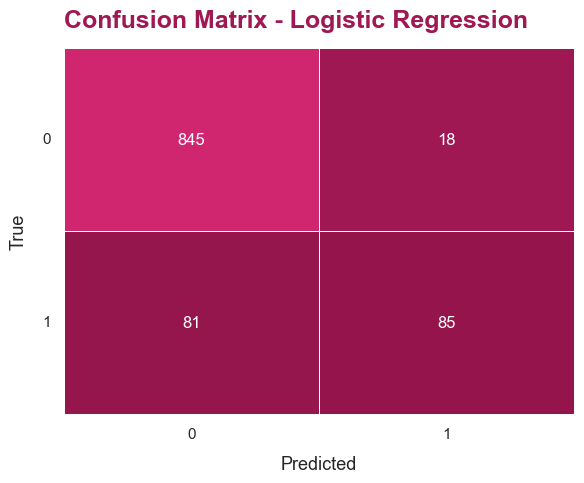

In [129]:
from matplotlib.colors import LinearSegmentedColormap

# Custom IBM brand color palette
custom_colors = ['#9f1853', '#740937', '#510224', '#d02670']
cmap = LinearSegmentedColormap.from_list("custom_ibm", custom_colors)

# Create figure and axes
plt.figure(figsize=(6, 5), facecolor='white')

# Plot the confusion matrix as a heatmap
sns.heatmap(
    confusion_matrix_lr,
    annot=True,
    fmt='d',  # display as integers
    cmap=cmap,
    cbar=False,
    linewidths=0.5,
    linecolor='white'
)

# Use the first color of the matrix palette for the title
title_color = custom_colors[0]

# Titles and axis labels
plt.title('Confusion Matrix - Logistic Regression', fontsize=18, fontweight='bold', loc='left', color=title_color, pad=15)
plt.xlabel('Predicted', fontsize=13, labelpad=10)
plt.ylabel('True', fontsize=13, labelpad=10)

# Customize tick fonts
plt.xticks(fontsize=11)
plt.yticks(fontsize=11, rotation=0)

# Remove grid lines on the outer box for minimalist style
sns.despine(left=True, bottom=True)

# Adjust layout for balanced whitespace
plt.tight_layout()

# Show the plot
plt.show()



In [130]:
from sklearn.metrics import classification_report

In [131]:
report_lr = classification_report(true_attrition_lr, predicted_attrition_lr)
print("Classification Report - Decision Trees:")
print(report_lr)

Classification Report - Decision Trees:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       863
           1       0.83      0.51      0.63       166

    accuracy                           0.90      1029
   macro avg       0.87      0.75      0.79      1029
weighted avg       0.90      0.90      0.89      1029



### <font color='#007d79'>2. Decision Trees</font>

In [132]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier

In [133]:
dt= DecisionTreeClassifier()
# Train Decision Tree Classifier
tree = dt.fit(X_train_combined,y_train)

In [134]:
grid_dt= GridSearchCV(
    dt,
    param_grid={
        'max_depth': [2,3,5,10],
        'min_samples_split': [3, 5,7],
        'max_features':[5,10,25,50]
    },
    cv=3,
    scoring='accuracy'
)

In [135]:
%%time
grid_dt.fit(X_train_combined, y_train)

CPU times: user 474 ms, sys: 11.2 ms, total: 486 ms
Wall time: 497 ms


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'max_features': [5, 10, 25, 50],
                         'min_samples_split': [3, 5, 7]},
             scoring='accuracy')

In [136]:
grid_dt.best_params_

{'max_depth': 3, 'max_features': 50, 'min_samples_split': 7}

In [137]:
grid_dt.best_score_

np.float64(0.8532555879494654)

In [138]:
results_dt=grid_dt.cv_results_
results_dt.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_max_features', 'param_min_samples_split', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [139]:
results_dt=pd.DataFrame(results_dt)
results_dt.T

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
mean_fit_time,0.00397,0.001558,0.001569,0.001434,0.00165,0.001252,0.001561,0.001392,0.001521,0.001887,...,0.002114,0.002115,0.001952,0.001978,0.003919,0.003293,0.003214,0.00529,0.005272,0.00494
std_fit_time,0.001542,0.000028,0.000169,0.000055,0.000078,0.000078,0.000023,0.000049,0.00005,0.000027,...,0.000397,0.00028,0.000059,0.000095,0.000287,0.000328,0.000046,0.000279,0.00029,0.000154
mean_score_time,0.003324,0.001194,0.001074,0.001028,0.001036,0.000986,0.000918,0.000842,0.000872,0.000844,...,0.001224,0.000971,0.000994,0.000992,0.001102,0.000942,0.001018,0.001128,0.001042,0.000897
std_score_time,0.002219,0.000049,0.00002,0.000044,0.000025,0.000123,0.000083,0.000011,0.000019,0.000006,...,0.000003,0.000051,0.000181,0.000155,0.000126,0.000054,0.000176,0.000278,0.000073,0.000009
param_max_depth,2,2,2,2,2,2,2,2,2,2,...,10,10,10,10,10,10,10,10,10,10
param_max_features,5,5,5,10,10,10,25,25,25,50,...,5,10,10,10,25,25,25,50,50,50
param_min_samples_split,3,5,7,3,5,7,3,5,7,3,...,7,3,5,7,3,5,7,3,5,7
params,"{'max_depth': 2, 'max_features': 5, 'min_sampl...","{'max_depth': 2, 'max_features': 5, 'min_sampl...","{'max_depth': 2, 'max_features': 5, 'min_sampl...","{'max_depth': 2, 'max_features': 10, 'min_samp...","{'max_depth': 2, 'max_features': 10, 'min_samp...","{'max_depth': 2, 'max_features': 10, 'min_samp...","{'max_depth': 2, 'max_features': 25, 'min_samp...","{'max_depth': 2, 'max_features': 25, 'min_samp...","{'max_depth': 2, 'max_features': 25, 'min_samp...","{'max_depth': 2, 'max_features': 50, 'min_samp...",...,"{'max_depth': 10, 'max_features': 5, 'min_samp...","{'max_depth': 10, 'max_features': 10, 'min_sam...","{'max_depth': 10, 'max_features': 10, 'min_sam...","{'max_depth': 10, 'max_features': 10, 'min_sam...","{'max_depth': 10, 'max_features': 25, 'min_sam...","{'max_depth': 10, 'max_features': 25, 'min_sam...","{'max_depth': 10, 'max_features': 25, 'min_sam...","{'max_depth': 10, 'max_features': 50, 'min_sam...","{'max_depth': 10, 'max_features': 50, 'min_sam...","{'max_depth': 10, 'max_features': 50, 'min_sam..."
split0_test_score,0.833819,0.833819,0.83965,0.83965,0.854227,0.822157,0.83965,0.83965,0.848397,0.83965,...,0.790087,0.813411,0.801749,0.787172,0.784257,0.819242,0.830904,0.760933,0.784257,0.804665
split1_test_score,0.83965,0.83965,0.813411,0.825073,0.80758,0.825073,0.822157,0.833819,0.825073,0.825073,...,0.80758,0.737609,0.787172,0.80758,0.781341,0.816327,0.825073,0.778426,0.790087,0.798834


In [140]:
#Evaluate the model in the test set
grid_dt.score(X_test_combined,y_test)

0.8503401360544217

In [141]:
grid_dt.predict(X_test_combined)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [142]:
true_attrition_dt=pd.DataFrame(y_train)
predicted_attrition_dt=pd.DataFrame(grid_dt.predict(X_train_combined))

In [143]:
true_attrition_dt=pd.DataFrame(y_train)
predicted_attrition_dt=pd.DataFrame(grid_dt.predict(X_train_combined))
# Calculate the confusion matrix
confusion_matrix_dt = confusion_matrix(true_attrition_dt, predicted_attrition_dt)
confusion_matrix_dt=pd.DataFrame(confusion_matrix_dt)
confusion_matrix_dt

,0,1
0,842,21
1,122,44


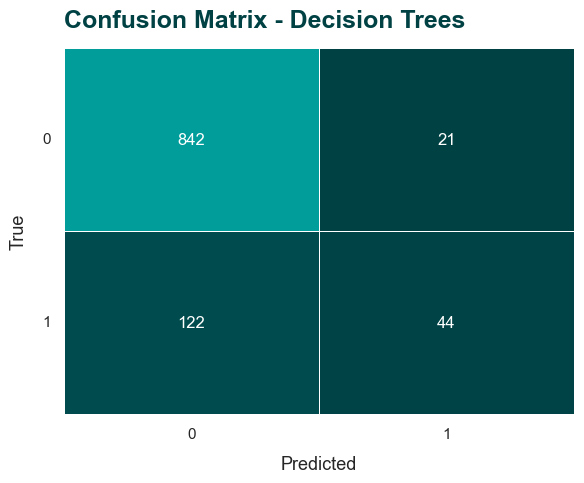

In [145]:
# Custom IBM teal color palette
custom_colors = ['#004144', '#005d5d', '#007d79', '#009d9a']
cmap = LinearSegmentedColormap.from_list("custom_teal_ibm", custom_colors)

# Create figure and axes
plt.figure(figsize=(6, 5), facecolor='white')

# Plot the confusion matrix as a heatmap
sns.heatmap(
    confusion_matrix_dt,
    annot=True,
    fmt='d',  # display as integers
    cmap=cmap,
    cbar=False,
    linewidths=0.5,
    linecolor='white'
)

# Use the first color of the matrix palette for the title
title_color = custom_colors[0]

# Titles and axis labels
plt.title('Confusion Matrix - Decision Trees', fontsize=18, fontweight='bold', loc='left', color=title_color, pad=15)
plt.xlabel('Predicted', fontsize=13, labelpad=10)
plt.ylabel('True', fontsize=13, labelpad=10)

# Customize tick fonts
plt.xticks(fontsize=11)
plt.yticks(fontsize=11, rotation=0)

# Remove grid lines on the outer box for minimalist style
sns.despine(left=True, bottom=True)

# Adjust layout for balanced whitespace
plt.tight_layout()

# Show the plot
plt.show()


In [146]:
report_dt = classification_report(true_attrition_dt, predicted_attrition_dt)
print("Classification Report - Decision Trees:")
print(report_dt)

Classification Report - Decision Trees:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       863
           1       0.68      0.27      0.38       166

    accuracy                           0.86      1029
   macro avg       0.78      0.62      0.65      1029
weighted avg       0.84      0.86      0.83      1029



### <font color='#8a3ffc'>3. K Nearest Neighbors</font>

In [147]:
#K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

In [148]:
knn = KNeighborsClassifier()

In [149]:
grid_knn = GridSearchCV(
    knn,
    param_grid={
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    cv=3,
    scoring='accuracy'
)

In [150]:
%%time
grid_knn.fit(X_train_combined, y_train)

CPU times: user 3.06 s, sys: 555 ms, total: 3.61 s
Wall time: 1.11 s


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [151]:
grid_knn.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

In [152]:
grid_knn.best_score_

np.float64(0.8513119533527697)

In [153]:
results_knn=grid_knn.cv_results_
results_knn.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'param_p', 'param_weights', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [154]:
results_knn=pd.DataFrame(results_knn)
results_knn.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
mean_fit_time,0.002977,0.001372,0.001046,0.001136,0.001032,0.000998,0.00101,0.001087,0.001115,0.001006,0.001,0.000985,0.001021,0.001173,0.001017,0.001052
std_fit_time,0.001809,0.000054,0.000033,0.000148,0.000025,0.000026,0.000018,0.000135,0.000137,0.000015,0.000015,0.000006,0.000026,0.000073,0.000011,0.000044
mean_score_time,0.212494,0.008972,0.011445,0.002744,0.014505,0.007096,0.010237,0.003258,0.014154,0.008488,0.010194,0.003284,0.014756,0.00852,0.009572,0.003121
std_score_time,0.27896,0.001748,0.002995,0.000356,0.000575,0.00001,0.000824,0.000216,0.000088,0.000607,0.000713,0.000274,0.000872,0.00027,0.000176,0.000209
param_n_neighbors,3,3,3,3,5,5,5,5,7,7,7,7,9,9,9,9
param_p,1,1,2,2,1,1,2,2,1,1,2,2,1,1,2,2
param_weights,uniform,distance,uniform,distance,uniform,distance,uniform,distance,uniform,distance,uniform,distance,uniform,distance,uniform,distance
params,"{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}","{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}","{'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}","{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}","{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}","{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}","{'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}","{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}","{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}","{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}","{'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}","{'n_neighbors': 7, 'p': 2, 'weights': 'distance'}","{'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}","{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}","{'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}","{'n_neighbors': 9, 'p': 2, 'weights': 'distance'}"
split0_test_score,0.848397,0.848397,0.822157,0.822157,0.845481,0.845481,0.83965,0.83965,0.83965,0.83965,0.842566,0.842566,0.848397,0.848397,0.842566,0.842566
split1_test_score,0.819242,0.819242,0.825073,0.825073,0.845481,0.845481,0.83965,0.83965,0.845481,0.845481,0.83965,0.83965,0.845481,0.845481,0.845481,0.845481


In [155]:
#Evaluate the model in the test set
grid_knn.score(X_test_combined,y_test)

0.8435374149659864

In [156]:
grid_knn.predict(X_test_combined)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [157]:
true_attrition_knn=pd.DataFrame(y_train)
predicted_attrition_knn=pd.DataFrame(grid_knn.predict(X_train_combined))

In [158]:
true_attrition_knn=pd.DataFrame(y_train)
predicted_attrition_knn=pd.DataFrame(grid_knn.predict(X_train_combined))
# Calculate the confusion matrix
confusion_matrix_knn = confusion_matrix(true_attrition_knn, predicted_attrition_knn)
confusion_matrix_knn=pd.DataFrame(confusion_matrix_knn)
confusion_matrix_knn

,0,1
0,859,4
1,126,40


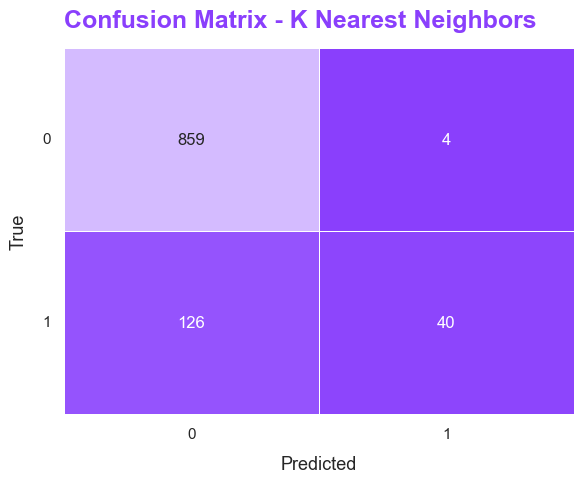

In [160]:
# Custom IBM violet color palette
custom_colors = ['#8a3ffc', '#a56eff', '#be95ff', '#d4bbff']
cmap = LinearSegmentedColormap.from_list("custom_violet_ibm", custom_colors)

# Create figure and axes
plt.figure(figsize=(6, 5), facecolor='white')

# Plot the confusion matrix as a heatmap
sns.heatmap(
    confusion_matrix_knn,
    annot=True,
    fmt='d',  # display as integers
    cmap=cmap,
    cbar=False,
    linewidths=0.5,
    linecolor='white'
)

# Use the first color of the matrix palette for the title
title_color = custom_colors[0]

# Titles and axis labels
plt.title('Confusion Matrix - K Nearest Neighbors', fontsize=18, fontweight='bold', loc='left', color=title_color, pad=15)
plt.xlabel('Predicted', fontsize=13, labelpad=10)
plt.ylabel('True', fontsize=13, labelpad=10)

# Customize tick fonts
plt.xticks(fontsize=11)
plt.yticks(fontsize=11, rotation=0)

# Remove grid lines on the outer box for minimalist style
sns.despine(left=True, bottom=True)

# Adjust layout for balanced whitespace
plt.tight_layout()

# Show the plot
plt.show()


In [161]:
report_knn = classification_report(true_attrition_knn, predicted_attrition_knn)
print("Classification Report - K Nearest Neighbors:")
print(report_knn)

Classification Report - K Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       863
           1       0.91      0.24      0.38       166

    accuracy                           0.87      1029
   macro avg       0.89      0.62      0.66      1029
weighted avg       0.88      0.87      0.84      1029



### <font color='#fa4d56'>4. Random Forest</font>

In [162]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [163]:
rf = RandomForestClassifier(random_state=42)

In [164]:
grid_rf = GridSearchCV(
    rf,
    param_grid={
    'n_estimators': [20, 50, 100],  
    'max_depth': [None, 10, 20],  
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [1, 2 ,4]
    },
    cv=3,
    scoring='accuracy'
)

In [165]:
%%time
grid_rf.fit(X_train_combined, y_train)

CPU times: user 15.7 s, sys: 66.6 ms, total: 15.8 s
Wall time: 16 s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [20, 50, 100]},
             scoring='accuracy')

In [166]:
grid_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 20}

In [167]:
grid_rf.best_score_

np.float64(0.8600583090379009)

In [168]:
results_rf=grid_rf.cv_results_
results_rf.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [169]:
results_rf=pd.DataFrame(results_rf)
results_rf.T

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
mean_fit_time,0.031738,0.058218,0.124855,0.023895,0.05644,0.135019,0.025129,0.054875,0.105015,0.023024,...,0.10485,0.021818,0.054434,0.10428,0.021431,0.051816,0.102323,0.023174,0.051494,0.100101
std_fit_time,0.009364,0.00033,0.00472,0.000472,0.000641,0.035143,0.002892,0.001452,0.001067,0.000421,...,0.002211,0.000245,0.001181,0.001574,0.000171,0.000354,0.000817,0.002288,0.000764,0.000605
mean_score_time,0.00238,0.003592,0.006262,0.002221,0.003729,0.006115,0.002196,0.003583,0.005581,0.002074,...,0.006123,0.002003,0.0037,0.005698,0.001923,0.003332,0.005559,0.002227,0.003342,0.00547
std_score_time,0.000349,0.000139,0.00032,0.000066,0.000194,0.000447,0.00014,0.000108,0.000118,0.000048,...,0.000748,0.000032,0.000471,0.000168,0.00001,0.00004,0.000063,0.000349,0.000117,0.000048
param_max_depth,None,None,None,None,None,None,None,None,None,None,...,20,20,20,20,20,20,20,20,20,20
param_min_samples_leaf,1,1,1,1,1,1,1,1,1,2,...,2,4,4,4,4,4,4,4,4,4
param_min_samples_split,5,5,5,10,10,10,15,15,15,5,...,15,5,5,5,10,10,10,15,15,15
param_n_estimators,20,50,100,20,50,100,20,50,100,20,...,100,20,50,100,20,50,100,20,50,100
params,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...","{'max_depth': None, 'min_samples_leaf': 1, 'mi...","{'max_depth': None, 'min_samples_leaf': 1, 'mi...","{'max_depth': None, 'min_samples_leaf': 1, 'mi...","{'max_depth': None, 'min_samples_leaf': 1, 'mi...","{'max_depth': None, 'min_samples_leaf': 1, 'mi...","{'max_depth': None, 'min_samples_leaf': 1, 'mi...","{'max_depth': None, 'min_samples_leaf': 1, 'mi...","{'max_depth': None, 'min_samples_leaf': 1, 'mi...","{'max_depth': None, 'min_samples_leaf': 2, 'mi...",...,"{'max_depth': 20, 'min_samples_leaf': 2, 'min_...","{'max_depth': 20, 'min_samples_leaf': 4, 'min_...","{'max_depth': 20, 'min_samples_leaf': 4, 'min_...","{'max_depth': 20, 'min_samples_leaf': 4, 'min_...","{'max_depth': 20, 'min_samples_leaf': 4, 'min_...","{'max_depth': 20, 'min_samples_leaf': 4, 'min_...","{'max_depth': 20, 'min_samples_leaf': 4, 'min_...","{'max_depth': 20, 'min_samples_leaf': 4, 'min_...","{'max_depth': 20, 'min_samples_leaf': 4, 'min_...","{'max_depth': 20, 'min_samples_leaf': 4, 'min_..."
split0_test_score,0.860058,0.851312,0.848397,0.851312,0.851312,0.851312,0.851312,0.848397,0.851312,0.848397,...,0.851312,0.845481,0.854227,0.851312,0.845481,0.848397,0.851312,0.848397,0.848397,0.851312


In [170]:
#Evaluate the model in the test set
grid_rf.score(X_test_combined,y_test)

0.8480725623582767

In [171]:
grid_rf.predict(X_test_combined)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [172]:
true_attrition_rf=pd.DataFrame(y_train)
predicted_attrition_rf=pd.DataFrame(grid_rf.predict(X_train_combined))

In [173]:
true_attrition_rf=pd.DataFrame(y_train)
predicted_attrition_rf=pd.DataFrame(grid_rf.predict(X_train_combined))
# Calculate the confusion matrix
confusion_matrix_rf = confusion_matrix(true_attrition_rf, predicted_attrition_rf)
confusion_matrix_rf=pd.DataFrame(confusion_matrix_rf)
confusion_matrix_rf

,0,1
0,863,0
1,26,140


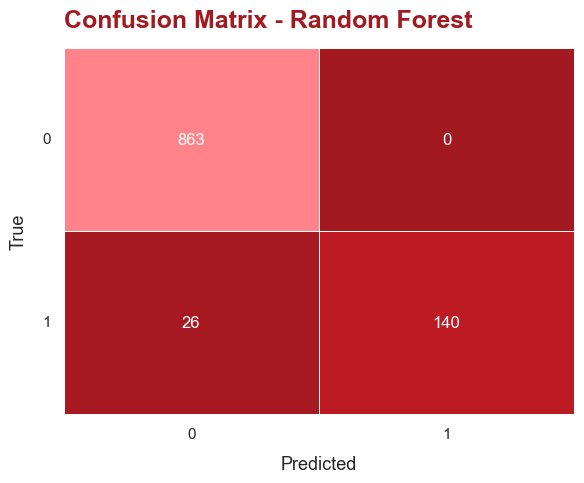

In [175]:
# Custom IBM red color palette
custom_colors = ['#a2191f', '#da1e28', '#fa4d56', '#ff8389']
cmap = LinearSegmentedColormap.from_list("custom_red_ibm", custom_colors)

# Create figure and axes
plt.figure(figsize=(6, 5), facecolor='white')

# Plot the confusion matrix as a heatmap
sns.heatmap(
    confusion_matrix_rf,
    annot=True,
    fmt='d',  # display as integers
    cmap=cmap,
    cbar=False,
    linewidths=0.5,
    linecolor='white'
)

# Use the first color of the matrix palette for the title
title_color = custom_colors[0]

# Titles and axis labels
plt.title('Confusion Matrix - Random Forest', fontsize=18, fontweight='bold', loc='left', color=title_color, pad=15)
plt.xlabel('Predicted', fontsize=13, labelpad=10)
plt.ylabel('True', fontsize=13, labelpad=10)

# Customize tick fonts
plt.xticks(fontsize=11)
plt.yticks(fontsize=11, rotation=0)

# Remove grid lines on the outer box for minimalist style
sns.despine(left=True, bottom=True)

# Adjust layout for balanced whitespace
plt.tight_layout()

# Show the plot
plt.show()


In [176]:
report_rf = classification_report(true_attrition_rf, predicted_attrition_knn)
print("Classification Report - Random Forest:")
print(report_rf)

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       863
           1       0.91      0.24      0.38       166

    accuracy                           0.87      1029
   macro avg       0.89      0.62      0.66      1029
weighted avg       0.88      0.87      0.84      1029



### <font color='#0f62fe'>Comparing the models</font>

In [177]:
#Compare all the models
lr_score=grid_lr.score(X_test_combined,y_test)
dt_score=grid_dt.score(X_test_combined,y_test)
knn_score=grid_knn.score(X_test_combined,y_test)
rf_score=grid_rf.score(X_test_combined,y_test)

accuracy_score = {
    'Model': ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors','Random Forest'],
    'Accuracy': [lr_score, dt_score, knn_score,rf_score]
}

accuracy_score = pd.DataFrame(accuracy_score)
print(accuracy_score)

                 Model  Accuracy
0  Logistic Regression  0.866213
1        Decision Tree  0.850340
2  K-Nearest Neighbors  0.843537
3        Random Forest  0.848073


<font color='##061727'>
Considering the parameters defined, the Logistic Regression model performed the best with a 0.866 accuracy score.